In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
THU = df['SiteName'].isin(['東大']) #找東大測站
df[THU]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460344,461639,東大,臺中市,52.0,細懸浮微粒,普通,3.5,NaN,NaN,15,...,29.0,16.0,14.5,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460433,461728,東大,臺中市,52.0,細懸浮微粒,普通,3.1,NaN,NaN,13,...,28.0,16.0,12.9,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460446,461741,東大,臺中市,51.0,細懸浮微粒,普通,3.3,NaN,NaN,11,...,28.0,16.0,12.5,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460535,461830,東大,臺中市,51.0,細懸浮微粒,普通,3.2,NaN,NaN,11,...,28.0,16.0,13.7,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460662,461957,東大,臺中市,49.0,細懸浮微粒,良好,5.2,NaN,NaN,11,...,27.0,15.0,13.4,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460789,462084,東大,臺中市,47.0,細懸浮微粒,良好,3.8,NaN,NaN,12,...,28.0,15.0,12.4,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460878,462173,東大,臺中市,48.0,細懸浮微粒,良好,3.5,NaN,NaN,13,...,28.0,15.0,11.3,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461195,462490,東大,臺中市,52.0,細懸浮微粒,普通,3.3,NaN,NaN,20,...,34.0,16.0,9.9,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461284,462579,東大,臺中市,52.0,細懸浮微粒,普通,3.2,NaN,NaN,23,...,38.0,16.0,9.3,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461373,462668,東大,臺中市,52.0,細懸浮微粒,普通,3.6,NaN,NaN,25,...,40.0,16.0,8.9,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
THU = df['SiteName'].isin(['東大']) #找東大測站
THU=df[THU].fillna(method='ffill').drop(columns=['CO','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


THU

,SO2,O3,PM10,PM25,NO2
0,3.5,15,29.0,16.0,14.5
1,3.1,13,28.0,16.0,12.9
2,3.3,11,28.0,16.0,12.5
3,3.2,11,28.0,16.0,13.7
4,5.2,11,27.0,15.0,13.4
5,3.8,12,28.0,15.0,12.4
6,3.5,13,28.0,15.0,11.3
7,3.3,20,34.0,16.0,9.9
8,3.2,23,38.0,16.0,9.3
9,3.6,25,40.0,16.0,8.9


In [5]:
cd4 = THU['PM25'].isin([0])
THU[cd4] #輸出整筆資料

,SO2,O3,PM10,PM25,NO2
239,0.0,0,0.0,0.0,15.9
240,0.0,0,0.0,0.0,15.9
241,0.0,0,0.0,0.0,15.9
571,0.0,0,0.0,0.0,14.5
800,0.0,0,0.0,0.0,24.1
928,4.6,19,0.0,0.0,15.0
929,4.3,25,0.0,0.0,14.3
951,0.0,0,0.0,0.0,12.7
958,0.0,0,0.0,0.0,15.0
959,0.0,0,0.0,0.0,15.0


In [6]:
THU.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值

THU

,SO2,O3,PM10,PM25,NO2
0,3.5,15,29.0,16.0,14.5
1,3.1,13,28.0,16.0,12.9
2,3.3,11,28.0,16.0,12.5
3,3.2,11,28.0,16.0,13.7
4,5.2,11,27.0,15.0,13.4
5,3.8,12,28.0,15.0,12.4
6,3.5,13,28.0,15.0,11.3
7,3.3,20,34.0,16.0,9.9
8,3.2,23,38.0,16.0,9.3
9,3.6,25,40.0,16.0,8.9


In [7]:
THU.fillna(method='ffill', inplace=True) #以前面數字來取代0值


THU

,SO2,O3,PM10,PM25,NO2
0,3.5,15,29.0,16.0,14.5
1,3.1,13,28.0,16.0,12.9
2,3.3,11,28.0,16.0,12.5
3,3.2,11,28.0,16.0,13.7
4,5.2,11,27.0,15.0,13.4
5,3.8,12,28.0,15.0,12.4
6,3.5,13,28.0,15.0,11.3
7,3.3,20,34.0,16.0,9.9
8,3.2,23,38.0,16.0,9.3
9,3.6,25,40.0,16.0,8.9


In [8]:
cd4 = THU['O3'].isin([0])
THU[cd4] #輸出整筆資料

,SO2,O3,PM10,PM25,NO2


In [9]:
THU['pr']=''
THU.drop([ 0,1],inplace=True)
THU.reset_index(drop=True,inplace=True)


THU.to_csv('THUpollution.csv')

THU

,SO2,O3,PM10,PM25,NO2,pr
0,3.3,11,28.0,16.0,12.5,
1,3.2,11,28.0,16.0,13.7,
2,5.2,11,27.0,15.0,13.4,
3,3.8,12,28.0,15.0,12.4,
4,3.5,13,28.0,15.0,11.3,
5,3.3,20,34.0,16.0,9.9,
6,3.2,23,38.0,16.0,9.3,
7,3.6,25,40.0,16.0,8.9,
8,4.2,27,43.0,17.0,7.7,
9,4.4,29,47.0,17.0,7.6,


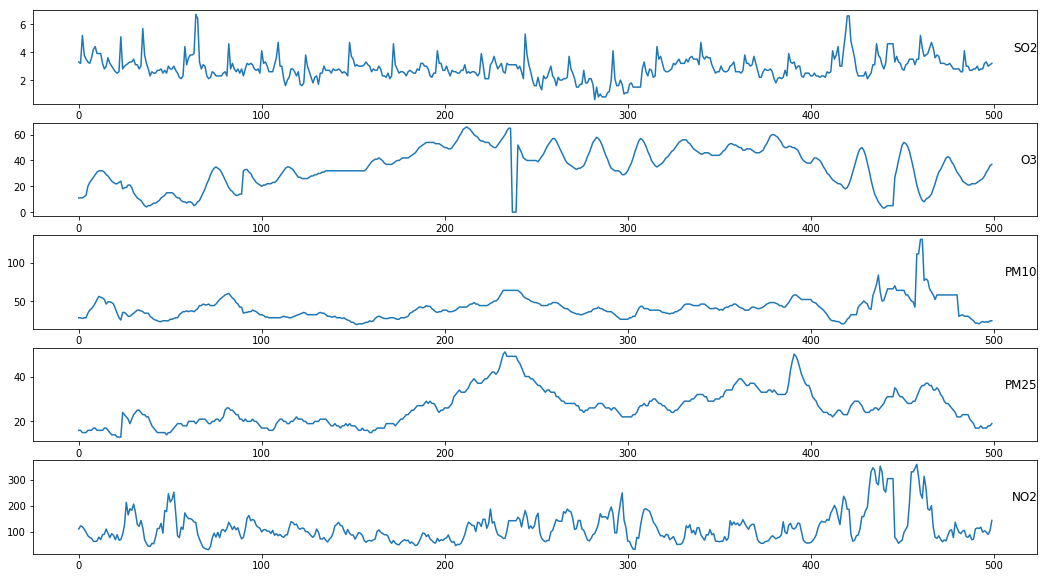

In [10]:
# load dataset
dataset =pd.read_csv('THUpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:500, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,O3,PM10,PM25,NO2,pr
0,3.3,11,28.0,16.0,12.5,NaN
1,3.2,11,28.0,16.0,13.7,NaN
2,5.2,11,27.0,15.0,13.4,NaN
3,3.8,12,28.0,15.0,12.4,NaN
4,3.5,13,28.0,15.0,11.3,NaN
5,3.3,20,34.0,16.0,9.9,NaN
6,3.2,23,38.0,16.0,9.3,NaN
7,3.6,25,40.0,16.0,8.9,NaN
8,4.2,27,43.0,17.0,7.7,NaN
9,4.4,29,47.0,17.0,7.6,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,O3,PM10,PM25,NO2,pr
0,-0.092680,-1.242043,-0.963442,-0.419685,-0.320682,16.0
1,-0.146031,-1.242043,-0.963442,-0.419685,-0.192134,16.0
2,0.920982,-1.242043,-1.004857,-0.483949,-0.224271,15.0
3,0.174073,-1.176631,-0.963442,-0.483949,-0.331395,15.0
4,0.014021,-1.111218,-0.963442,-0.483949,-0.449231,15.0
5,-0.092680,-0.653332,-0.714954,-0.419685,-0.599205,16.0
6,-0.146031,-0.457094,-0.549295,-0.419685,-0.663479,16.0
7,0.067372,-0.326269,-0.466465,-0.419685,-0.706329,16.0
8,0.387476,-0.195445,-0.342221,-0.355420,-0.834878,17.0
9,0.494177,-0.064620,-0.176562,-0.355420,-0.845590,17.0


In [13]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
'''
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X, Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
    '''

'\n# 將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X, Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n    '

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
X_train.shape

(6147, 12, 5)

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 5))`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 58/500
5532/5532 [==============================] - 1s 186us/step - loss: 47.0239 - val_loss: 24.5594
Epoch 59/500
5532/5532 [==============================] - 1s 193us/step - loss: 47.5342 - val_loss: 24.5870
Epoch 60/500
5532/5532 [==============================] - 1s 174us/step - loss: 47.3622 - val_loss: 24.2589
Epoch 61/500
5532/5532 [==============================] - 1s 166us/step - loss: 47.8088 - val_loss: 23.9673
Epoch 62/500
5532/5532 [==============================] - 1s 182us/step - loss: 47.6174 - val_loss: 23.8121
Epoch 63/500
5532/5532 [==============================] - 1s 180us/step - loss: 47.9670 - val_loss: 23.7474
Epoch 64/500
5532/5532 [==============================] - 1s 182us/step - loss: 47.0962 - val_loss: 24.1410
Epoch 65/500
5532/5532 [==============================] - 1s 192us/step - loss: 47.0916 - val_loss: 26.2217
Epoch 66/500
5532/5532 [==============================] - 1s 165us/step - loss: 46.8934 - val_loss: 24.0275
Epoch 67/500
5532/5532 [====

5532/5532 [==============================] - 1s 167us/step - loss: 38.1588 - val_loss: 20.7409
Epoch 134/500
5532/5532 [==============================] - 1s 186us/step - loss: 37.5911 - val_loss: 20.9750
Epoch 135/500
5532/5532 [==============================] - 1s 168us/step - loss: 37.6555 - val_loss: 20.9483
Epoch 136/500
5532/5532 [==============================] - 1s 179us/step - loss: 36.9785 - val_loss: 20.7736
Epoch 137/500
5532/5532 [==============================] - 1s 191us/step - loss: 36.1394 - val_loss: 20.4480
Epoch 138/500
5532/5532 [==============================] - 1s 183us/step - loss: 37.1998 - val_loss: 20.6078
Epoch 139/500
5532/5532 [==============================] - 1s 178us/step - loss: 36.9936 - val_loss: 20.4329
Epoch 140/500
5532/5532 [==============================] - 1s 179us/step - loss: 37.2173 - val_loss: 21.5253
Epoch 141/500
5532/5532 [==============================] - 1s 187us/step - loss: 36.4966 - val_loss: 20.6326
Epoch 142/500
5532/5532 [========

5532/5532 [==============================] - 1s 183us/step - loss: 31.1912 - val_loss: 18.4152
Epoch 209/500
5532/5532 [==============================] - 1s 175us/step - loss: 30.0044 - val_loss: 18.0864
Epoch 210/500
5532/5532 [==============================] - 1s 173us/step - loss: 31.4923 - val_loss: 18.0904
Epoch 211/500
5532/5532 [==============================] - 1s 182us/step - loss: 31.8073 - val_loss: 17.6217
Epoch 212/500
5532/5532 [==============================] - 1s 186us/step - loss: 31.7036 - val_loss: 17.1550
Epoch 213/500
5532/5532 [==============================] - 1s 182us/step - loss: 31.6357 - val_loss: 19.1789
Epoch 214/500
5532/5532 [==============================] - 1s 175us/step - loss: 33.4371 - val_loss: 19.1253
Epoch 215/500
5532/5532 [==============================] - 1s 188us/step - loss: 31.3796 - val_loss: 17.0358
Epoch 216/500
5532/5532 [==============================] - 1s 170us/step - loss: 31.9060 - val_loss: 17.0178
Epoch 217/500
5532/5532 [========

5532/5532 [==============================] - 1s 182us/step - loss: 27.1023 - val_loss: 15.0106
Epoch 284/500
5532/5532 [==============================] - 1s 194us/step - loss: 28.5590 - val_loss: 15.1571
Epoch 285/500
5532/5532 [==============================] - 1s 184us/step - loss: 28.6882 - val_loss: 15.6560
Epoch 286/500
5532/5532 [==============================] - 1s 188us/step - loss: 28.0125 - val_loss: 14.8326
Epoch 287/500
5532/5532 [==============================] - 1s 185us/step - loss: 27.5995 - val_loss: 14.5895
Epoch 288/500
5532/5532 [==============================] - 1s 181us/step - loss: 27.0172 - val_loss: 15.1751
Epoch 289/500
5532/5532 [==============================] - 1s 181us/step - loss: 27.4663 - val_loss: 14.7602
Epoch 290/500
5532/5532 [==============================] - 1s 186us/step - loss: 26.9768 - val_loss: 14.9733
Epoch 291/500
5532/5532 [==============================] - 1s 170us/step - loss: 29.0573 - val_loss: 15.5948
Epoch 292/500
5532/5532 [========

5532/5532 [==============================] - 1s 144us/step - loss: 25.1297 - val_loss: 13.1430
Epoch 359/500
5532/5532 [==============================] - 1s 162us/step - loss: 25.1310 - val_loss: 13.1964
Epoch 360/500
5532/5532 [==============================] - 1s 165us/step - loss: 25.3392 - val_loss: 15.1781
Epoch 361/500
5532/5532 [==============================] - 1s 156us/step - loss: 25.3904 - val_loss: 13.6415
Epoch 362/500
5532/5532 [==============================] - 1s 155us/step - loss: 25.9804 - val_loss: 13.5427
Epoch 363/500
5532/5532 [==============================] - 1s 144us/step - loss: 25.7807 - val_loss: 14.4919
Epoch 364/500
5532/5532 [==============================] - 1s 143us/step - loss: 24.2826 - val_loss: 13.0624
Epoch 365/500
5532/5532 [==============================] - 1s 146us/step - loss: 25.7920 - val_loss: 13.2704
Epoch 366/500
5532/5532 [==============================] - 1s 155us/step - loss: 24.7367 - val_loss: 13.2434
Epoch 367/500
5532/5532 [========

5532/5532 [==============================] - 1s 139us/step - loss: 23.9337 - val_loss: 12.2389
Epoch 434/500
5532/5532 [==============================] - 1s 145us/step - loss: 24.4275 - val_loss: 12.8688
Epoch 435/500
5532/5532 [==============================] - 1s 133us/step - loss: 22.9408 - val_loss: 12.6577
Epoch 436/500
5532/5532 [==============================] - 1s 136us/step - loss: 24.0974 - val_loss: 12.0215
Epoch 437/500
5532/5532 [==============================] - 1s 149us/step - loss: 22.7757 - val_loss: 11.9637
Epoch 438/500
5532/5532 [==============================] - 1s 147us/step - loss: 22.6189 - val_loss: 12.2782
Epoch 439/500
5532/5532 [==============================] - 1s 145us/step - loss: 24.2284 - val_loss: 12.1362
Epoch 440/500
5532/5532 [==============================] - 1s 152us/step - loss: 23.0852 - val_loss: 12.2716
Epoch 441/500
5532/5532 [==============================] - 1s 143us/step - loss: 23.6919 - val_loss: 12.0487
Epoch 442/500
5532/5532 [========

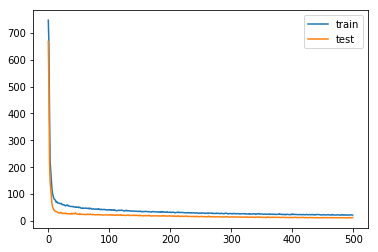

In [18]:
from keras.layers import Dropout


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#儲存model
model.save('THUmodel.h5')
del model

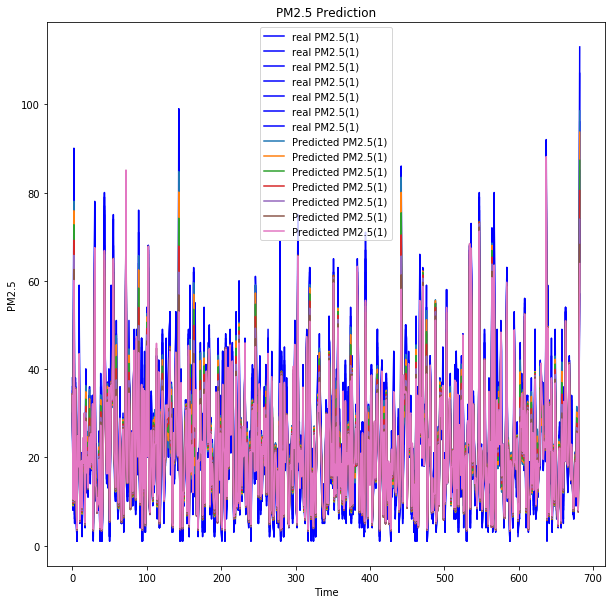

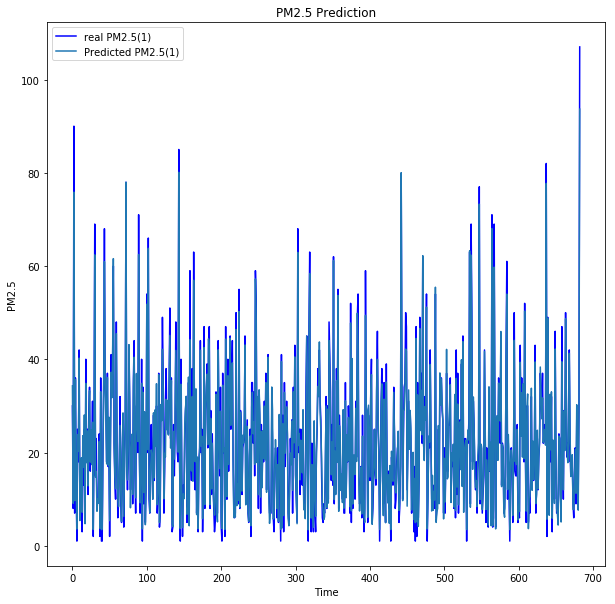

Train 0.5344070278184481
Validation 0.5021961932650073
The R2 score on the Test set is:	0.943
Train Score: 3.29 RMSE
Test Score: 3.68 RMSE
The MSE   on the Test set is: 13.549649254806992
The RMSE  on the Test set is: 3.6809848213225482
The MAE   on the Test set is: 2.6517924349369353
The MAPE  on the Test set is: 0.03463521925025583
The SMAPE on the Test set is: 0.02647867076579039


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [19]:
#讀取model3
model = load_model('THUmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.figure(figsize=(10,10)) 
plt.plot(Y_val, color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict, label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
plt.figure(figsize=(10,10)) 
plt.plot(Y_val[0:,1], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:,1], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

# print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

